# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Exporting Datasets

In [2]:
# Export Dataset 1 (core.csv)

df1 = pd.read_csv("core.csv")
df1.head()

,Name,ID,Country,Website,Groups,Region,Stage,Sector,Description,AI_Publications,...,Knowledge_Representation,Language_Processing,Measuring_n_Testing,Planning_n_Scheduling,Robotics,Speech_Processing,Workforce_AI_workers,Workforce_Tech_Team_Workers,City,State/province
0,Accenture Plc,803,Ireland,https://www.accenture.com/,S&P 500,Europe,Mature,Software & IT Services,"Accenture is a professional services company, ...",208,...,102,33,13,129,0,23,13610,166212,Dublin,Dublin
1,Cognizant,806,United States,https://www.cognizant.com,S&P 500,North America,Mature,Software & IT Services,"Cognizant is a professional services company, ...",209,...,12,1,0,7,0,5,5226,130530,Teaneck,New Jersey
2,Amazon,23,United States,http://amazon.com,"S&P 500, Global Big Tech",North America,Mature,Retailers,Amazon is a global tech firm with a focus on e...,3313,...,135,23,179,131,9,265,14164,128591,Seattle,Washington
3,IBM,115,United States,http://www.ibm.com/,"S&P 500, Global Big Tech",North America,Mature,Software & IT Services,IBM is an IT technology and consulting firm pr...,7428,...,1753,386,296,828,4,471,6114,117521,Armonk,New York
4,Microsoft,163,United States,http://www.microsoft.com,"S&P 500, Global Big Tech, GenAI Contenders",North America,Mature,Software & IT Services,Microsoft is a software corporation that devel...,9807,...,468,214,61,550,0,365,5245,104414,Redmond,Washington


In [4]:
# Export Dataset 2 (ticker.csv)

df2 = pd.read_csv("ticker.csv")
df2.head()

,Name,ID,Ticker,Exchange
0,C. H. Robinson Worldwide,2239,CHRW,NASDAQ
1,Kraft Heinz,2161,KHC,NASDAQ
2,Fastenal,2316,FAST,NASDAQ
3,Splunk,237,SPLK,NASDAQ
4,Kroger,1813,KR,NYSE


# Exploring Dataset

In [ ]:
# Checking for Missing Headers
df1.columns.isna(), df2.columns.isna()

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]),
 array([False, False, False, False]))

In [112]:
# Checking for duplicate records - No duplicated data present
df1.shape, df1.drop_duplicates().shape

((678, 56), (678, 56))

In [ ]:
# Checking for duplicate records - 2 duplicated data present
df2.shape, df2.drop_duplicates().shape

((711, 4), (709, 4))

In [ ]:
# Identifiying Duplicated records
df2[df2.duplicated()]

,Name,ID,Ticker,Exchange
548,Ingersoll Rand,2367,IR,NYSE
664,SL Green Realty,2491,SLG.PRI,NYSE


In [ ]:
# Searching up one of the duplicated records
df2[df2['Name']=="Ingersoll Rand"]

,Name,ID,Ticker,Exchange
547,Ingersoll Rand,2367,IR,NYSE
548,Ingersoll Rand,2367,IR,NYSE


In [ ]:
# Checking for Null values in df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              678 non-null    object 
 1   ID                                678 non-null    int64  
 2   Country                           675 non-null    object 
 3   Website                           675 non-null    object 
 4   Groups                            520 non-null    object 
 5   Region                            675 non-null    object 
 6   Stage                             678 non-null    object 
 7   Sector                            678 non-null    object 
 8   Description                       671 non-null    object 
 9   AI_Publications                   678 non-null    int64  
 10  AI_Growth                         330 non-null    float64
 11  Percentage                        678 non-null    float64
 12  Conferen

In [ ]:
# Finding Count of null values in df1
df1.isnull().sum()

Name                                  0
ID                                    0
Country                               3
Website                               3
Groups                              158
Region                                3
Stage                                 0
Sector                                0
Description                           7
AI_Publications                       0
AI_Growth                           348
Percentage                            0
Conference_Publication                0
Citations                             0
CV_publications                       0
NLP_publications                      0
Robotics_publications                 0
Total_Publications                    0
AI patents                            0
Patents_Growth                      354
Patent_Percentage                     0
Granted_AI_patents                    0
Total_patents                         0
Agriculture                           0
Banking_n_Finance                     0


In [121]:
# Checking for Null values in df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      711 non-null    object
 1   ID        711 non-null    int64 
 2   Ticker    711 non-null    object
 3   Exchange  711 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.3+ KB


In [120]:
# Finding Count of null values in df2
df2.isnull().sum()

Name        0
ID          0
Ticker      0
Exchange    0
dtype: int64

# Data Cleansing

In [123]:
# Removing duplicate values in df2
df2 = df2.drop_duplicates(keep="first")
df2.head()

,Name,ID,Ticker,Exchange
0,C. H. Robinson Worldwide,2239,CHRW,NASDAQ
1,Kraft Heinz,2161,KHC,NASDAQ
2,Fastenal,2316,FAST,NASDAQ
3,Splunk,237,SPLK,NASDAQ
4,Kroger,1813,KR,NYSE


# Filtering out columns

Dependant Varaibles: AI patents, AI_Publications

Independant Variable: Workforce_AI_workers, Workforce_Tech_Team_Workers

In [6]:
# Filtering out important col
df = df1[["Name", "AI patents", "AI_Publications", "Workforce_AI_workers", "Workforce_Tech_Team_Workers"]]
df.head()

,Name,AI patents,AI_Publications,Workforce_AI_workers,Workforce_Tech_Team_Workers
0,Accenture Plc,489,208,13610,166212
1,Cognizant,77,209,5226,130530
2,Amazon,1819,3313,14164,128591
3,IBM,8724,7428,6114,117521
4,Microsoft,3728,9807,5245,104414


# Graphs

# Box Plot

[]

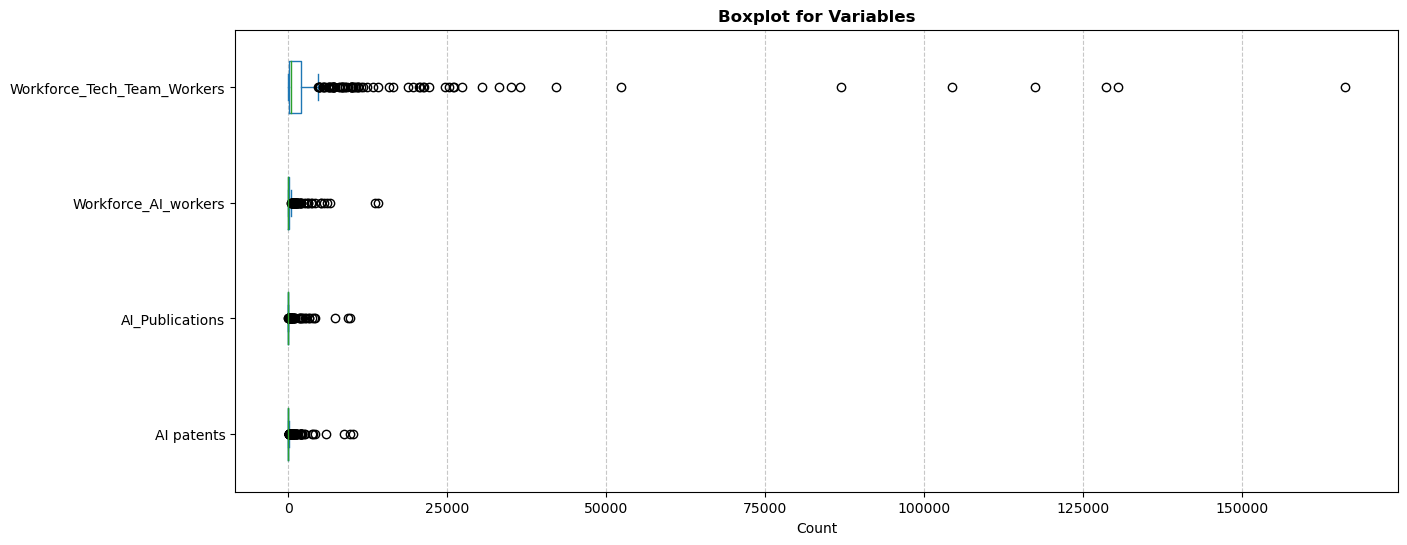

In [95]:
boxplotdf = df.drop(['Name'], axis=1)

ax = boxplotdf.plot.box(figsize=(15, 6), vert=False)
ax.set_xlabel("Count")
ax.set_title('Boxplot for Variables', fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.plot()

# Scatter Plots

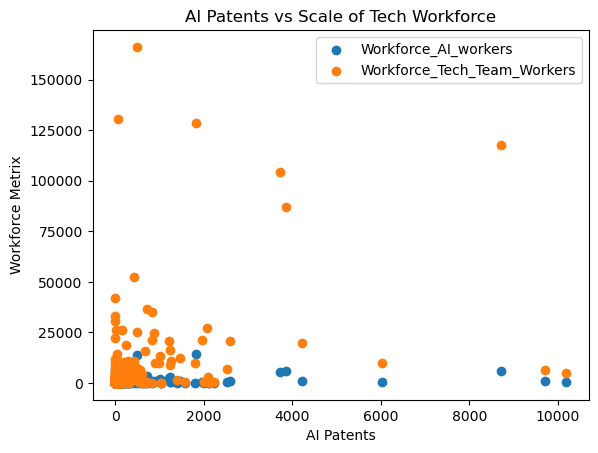

In [78]:
fig, ax = plt.subplots()

ax.scatter(x=df["AI patents"], y=df["Workforce_AI_workers"])
ax.scatter(x=df["AI patents"], y=df["Workforce_Tech_Team_Workers"])
ax.legend(["Workforce_AI_workers", 'Workforce_Tech_Team_Workers'])
plt.xlabel("AI Patents")
plt.ylabel("Workforce Metrix")
plt.title("AI Patents vs Scale of Tech Workforce")

plt.show()

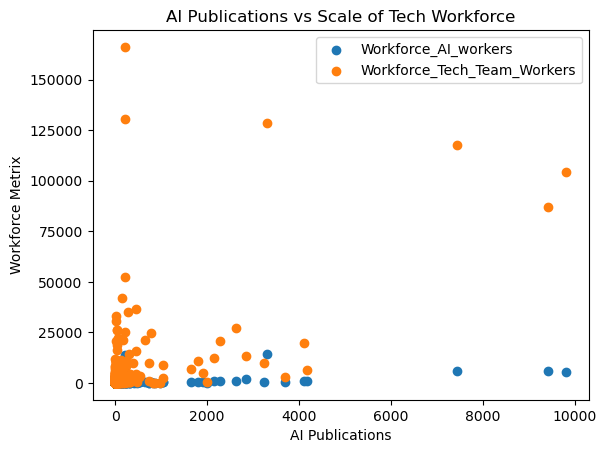

In [77]:
fig, ax = plt.subplots()


ax.scatter(x=df["AI_Publications"], y=df["Workforce_AI_workers"])
ax.scatter(x=df["AI_Publications"], y=df["Workforce_Tech_Team_Workers"])
ax.legend(["Workforce_AI_workers", 'Workforce_Tech_Team_Workers'])
plt.xlabel("AI Publications")
plt.ylabel("Workforce Metrix")
plt.title("AI Publications vs Scale of Tech Workforce")

plt.show()